In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from LSTM_for_Stock.data_processor import DataLoader
from LSTM_for_Stock.model import Model
import seaborn as sns

Using TensorFlow backend.


In [4]:
dataloader = DataLoader('601398', '399300')
model = Model()
comp = {"optimizer": "adam",
        "loss": "mse",
        "metrics": [
            "mae",
            "acc"
        ]}
norm = True
days = 15
window = 120
layers = [{'units': 100, 'type': 'lstm','return_sequences':True},
          {'rate': 0.15, 'type': 'dropout'},
          {'units': 200, 'type': 'lstm','return_sequences':False},
    {'units': days, 'type': 'dense', 'activation': 'linear'}]
train = {'epochs': 1000, 'verbose': 2, 'validation_split': 0.15}

model.build_model(layers, comp)
X, Y = dataloader.get_train_data(window, days, norm)
history = model.train(X, Y, train)

QUANTAXIS>> From C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\tensorflow\python\ops\math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 2146 samples, validate on 379 samples
Epoch 1/1000
 - 22s - loss: 3.3447e-04 - mean_absolute_error: 0.0106 - acc: 0.0652 - val_loss: 3.5036e-05 - val_mean_absolute_error: 0.0049 - val_acc: 0.0475
Epoch 2/1000
 - 20s - loss: 3.5867e-05 - mean_absolute_error: 0.0044 - acc: 0.0746 - val_loss: 4.2281e-05 - val_mean_absolute_error: 0.0056 - val_acc: 0.0422
Epoch 3/1000
 - 20s - loss: 3.3352e-05 - mean_absolute_error: 0.0042 - acc: 0.0713 - val_loss: 9.6943e-06 - val_mean_absolute_error: 0.0024 - val_acc: 0.0554
Epoch 4/1000
 - 20s - loss: 2.9385e-05 - mean_absolute_error: 0.0040 - acc: 0.0722 - val_loss: 2.8464e-05 - val_mean_absolute_error: 0.0044 - val_acc: 0.0422
Epoch 5/1000
 - 21s - loss: 2.8074e-05 - mean_absolute_error: 0.0039 - acc: 0.0671 - val_loss: 1.3217e-05 - val_mean_absolute_error: 0.0026 - val_acc: 0.0343
Epoch 6/1000
 - 20s - loss: 2.8164e-05 - mean_absolute_error: 0.0039 - acc: 0.0727 - val_loss: 9.9849e-06 - val_mean_absolute_error: 0.0026 - val_acc: 0.0369
Epoch

Epoch 53/1000
 - 20s - loss: 1.9163e-05 - mean_absolute_error: 0.0032 - acc: 0.0876 - val_loss: 6.6597e-06 - val_mean_absolute_error: 0.0019 - val_acc: 0.0660
Epoch 54/1000
 - 20s - loss: 1.9609e-05 - mean_absolute_error: 0.0032 - acc: 0.0862 - val_loss: 6.6237e-05 - val_mean_absolute_error: 0.0076 - val_acc: 0.0976
Epoch 55/1000
 - 21s - loss: 2.1543e-05 - mean_absolute_error: 0.0034 - acc: 0.0885 - val_loss: 1.2148e-05 - val_mean_absolute_error: 0.0025 - val_acc: 0.0607
Epoch 56/1000
 - 20s - loss: 1.9099e-05 - mean_absolute_error: 0.0031 - acc: 0.0918 - val_loss: 3.2057e-05 - val_mean_absolute_error: 0.0049 - val_acc: 0.0950
Epoch 57/1000
 - 20s - loss: 2.0922e-05 - mean_absolute_error: 0.0033 - acc: 0.1156 - val_loss: 3.0530e-05 - val_mean_absolute_error: 0.0047 - val_acc: 0.0528
Epoch 58/1000
 - 21s - loss: 2.0311e-05 - mean_absolute_error: 0.0033 - acc: 0.0904 - val_loss: 1.9932e-05 - val_mean_absolute_error: 0.0038 - val_acc: 0.0633
Epoch 59/1000
 - 20s - loss: 2.1813e-05 - mean

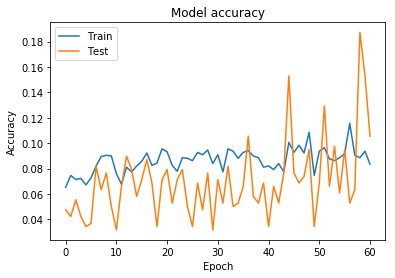

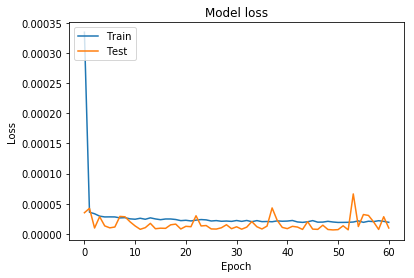

In [5]:
import matplotlib.pyplot as plt

# 绘制训练 & 验证的准确率值
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [6]:
def plot_pred(pred,real,d):
    for day in range(d):
        plt.figure(figsize=(18, 5))
        sns.lineplot(
            x=range(len(real)), y=real[:, day], label='day_{0}'.format(day + 1))
        sns.lineplot(
            x=range(len(pred)),
            y=pred[:, day],
            label='day_{0}_pred'.format(day + 1))
        plt.show()

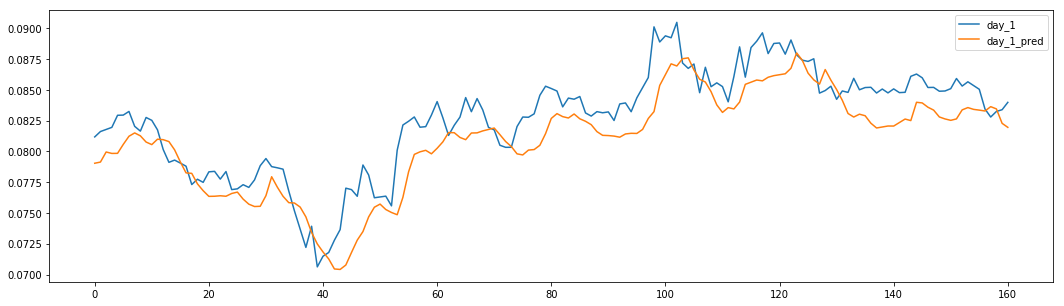

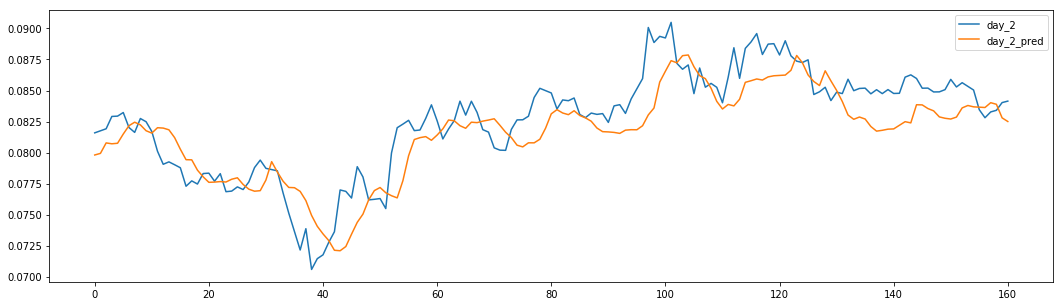

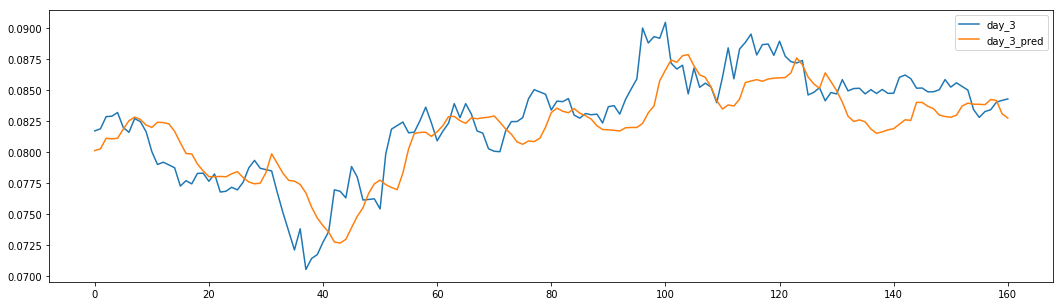

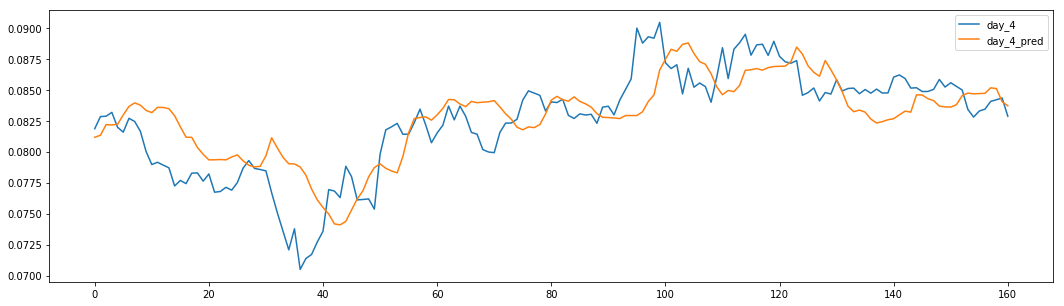

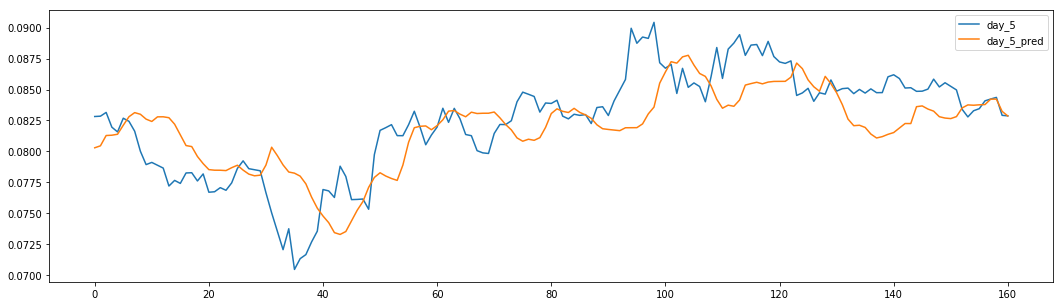

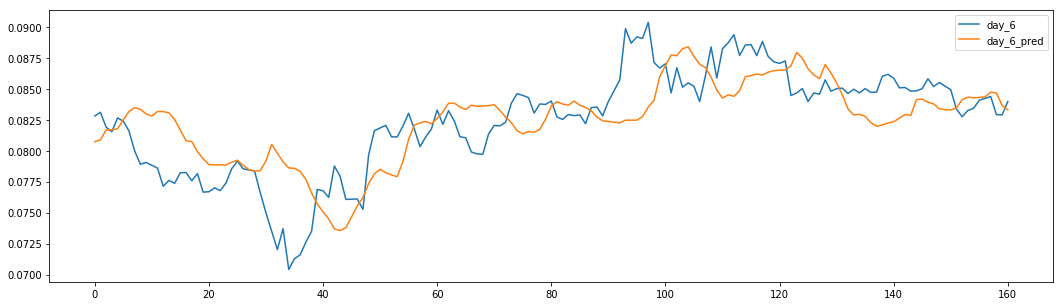

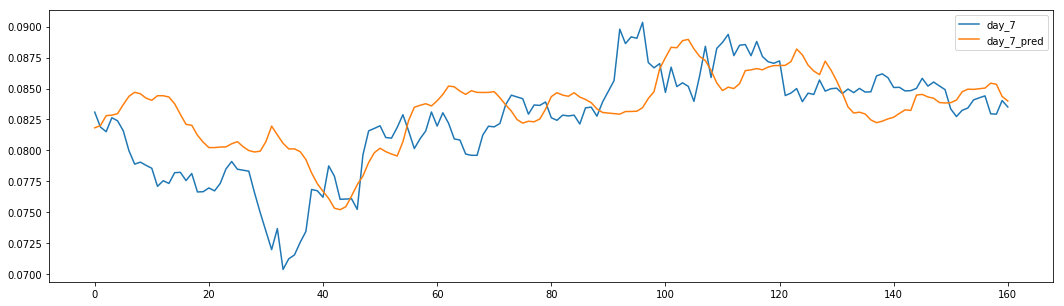

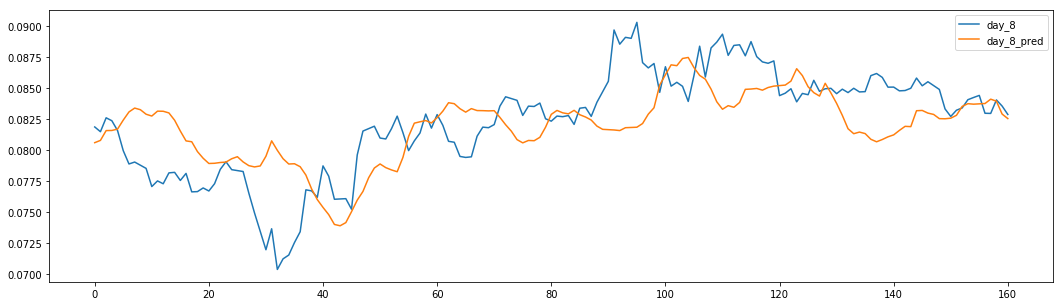

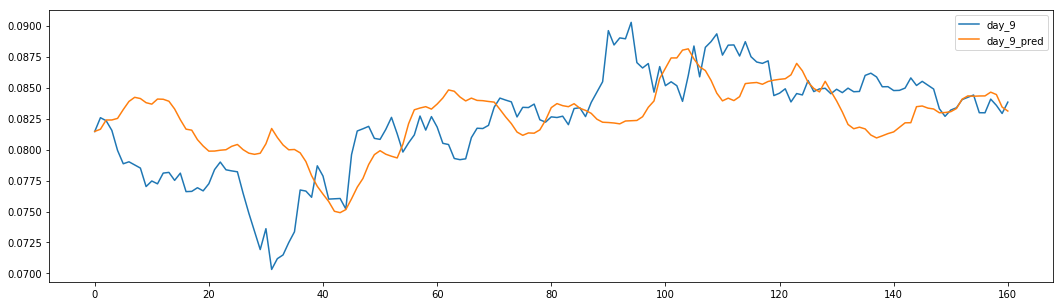

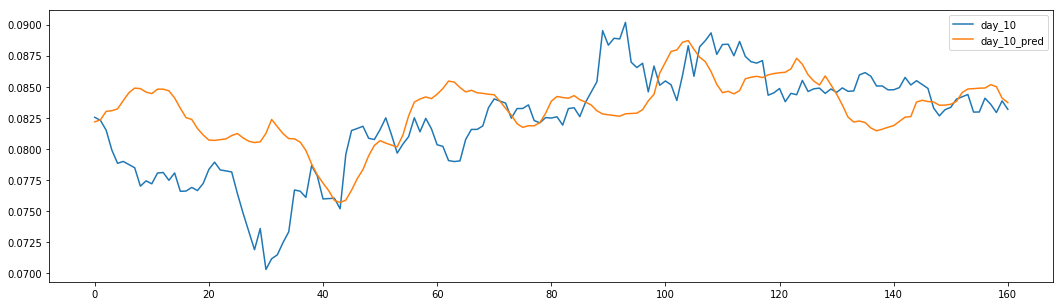

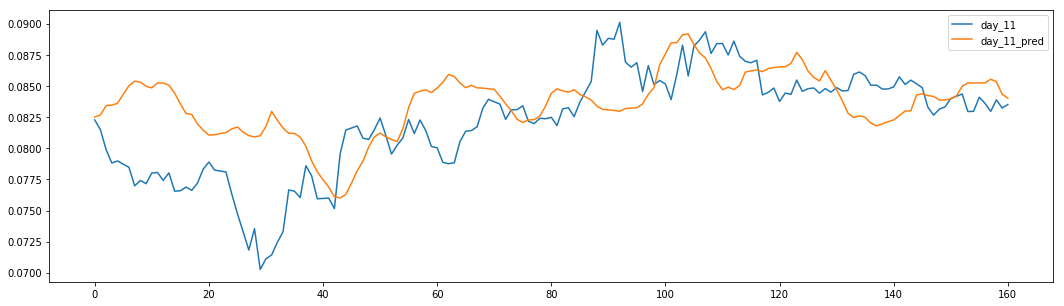

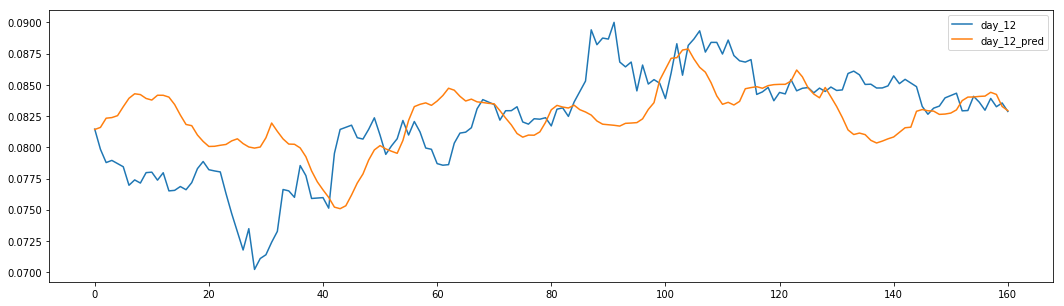

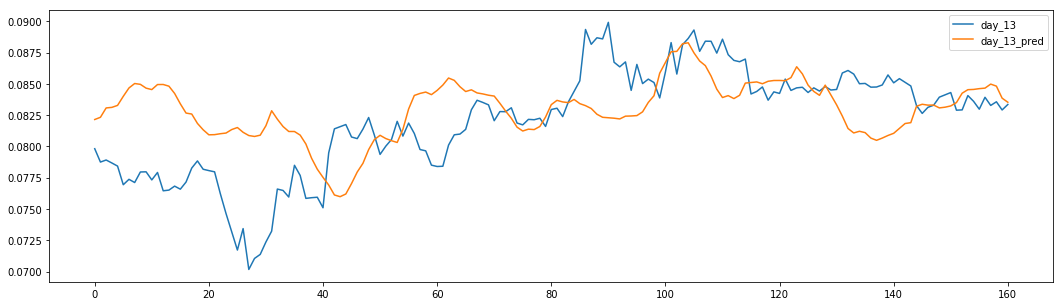

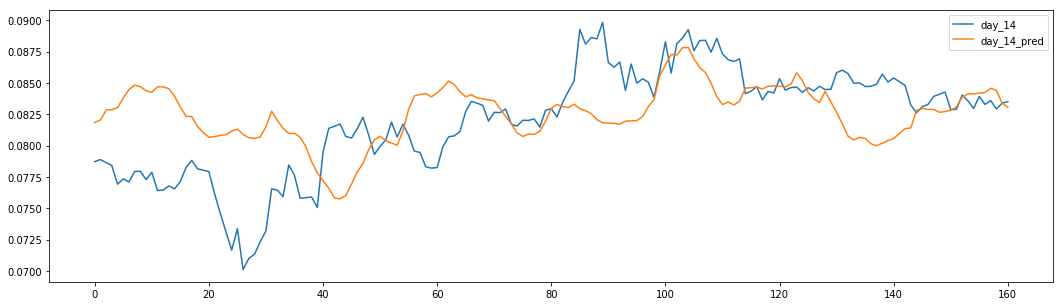

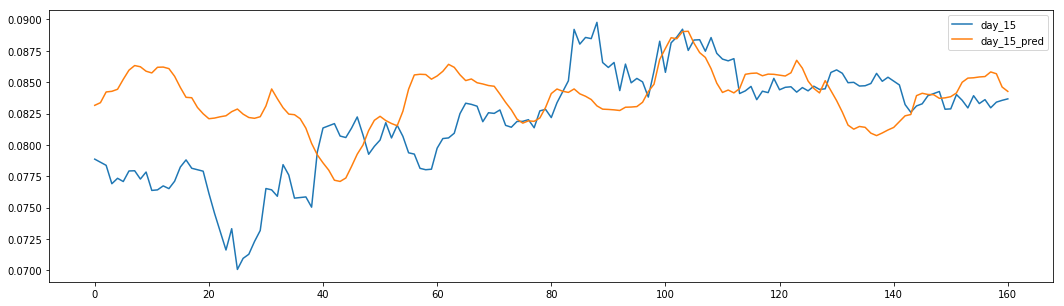

In [7]:
X_val,Y_val=dataloader.get_valid_data(window,days,norm)
Y_pred=model.predict(X_val,{ 'verbose': 2})
plot_pred(Y_pred,Y_val,days)

In [8]:
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
	# Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i)]
        plt.plot(padding + list(data))
        plt.legend()
    plt.show()

In [28]:
-(window+days)*2

-270

In [29]:
import datetime
start_online=(dataloader.data.index[-1]+datetime.timedelta(days=-(window+days)*2)).strftime('%Y-%m-%d')
print(start_online)
online_data=DataLoader('601398', '399300',split=0,online=True,start=start_online)
online_data.data.shape

2018-04-23


(218, 10)

In [30]:
X_online,Y_online=online_data.get_train_data(window,days,norm)
print(X_online.shape),print(Y_online.shape)
Y_pred_online=model.predict(X_online,{ 'verbose': 2})

(83, 120, 10)
(83, 15)


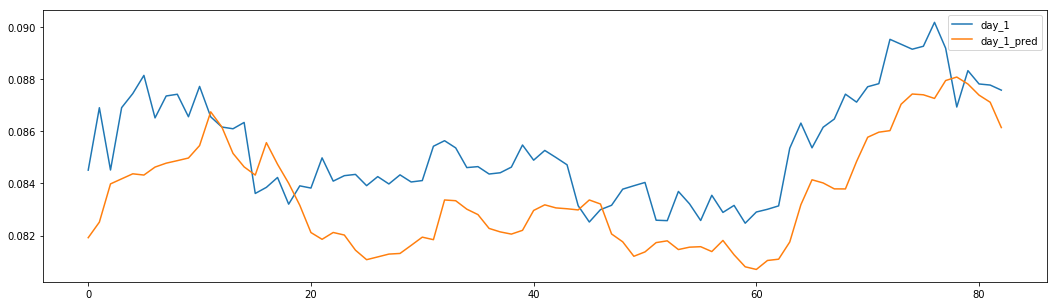

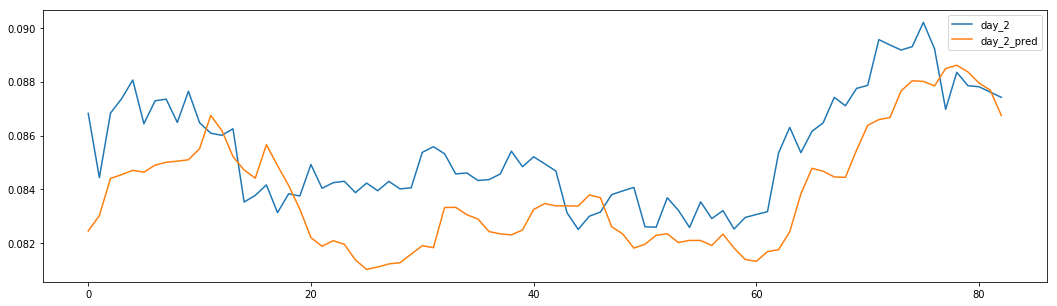

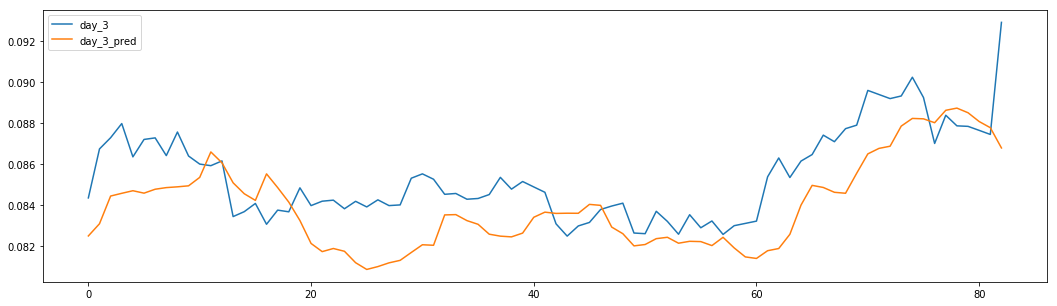

In [31]:
plot_pred(Y_pred_online,Y_online,3)

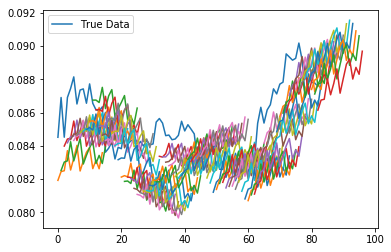

In [32]:
plot_results_multiple(Y_pred_online,Y_online[:,0],days)

In [33]:
Y_pred_online

array([[0.08192261, 0.08245233, 0.08249971, ..., 0.08313719, 0.08261785,
        0.08358362],
       [0.08251873, 0.0830227 , 0.08309539, ..., 0.08342326, 0.08293737,
        0.08394609],
       [0.08398464, 0.08440723, 0.08444903, ..., 0.08440854, 0.08399202,
        0.08509231],
       ...,
       [0.08738701, 0.0879514 , 0.08808875, ..., 0.08980238, 0.08939238,
        0.09091222],
       [0.08711471, 0.08769064, 0.08778808, ..., 0.0895278 , 0.08913218,
        0.09061316],
       [0.08614395, 0.08674995, 0.0867983 , ..., 0.08871586, 0.08829841,
        0.0896866 ]], dtype=float32)

In [34]:
Y_online[:,0]

array([0.08451229, 0.08690434, 0.08451757, 0.08690722, 0.08744652,
       0.08814353, 0.08651476, 0.08735441, 0.08742079, 0.08655879,
       0.08772111, 0.08655509, 0.08616513, 0.08609752, 0.0863399 ,
       0.08361806, 0.08385214, 0.08423073, 0.08320851, 0.08390954,
       0.08382509, 0.08498257, 0.08409075, 0.08430001, 0.08434866,
       0.08391704, 0.08426405, 0.08398237, 0.08433087, 0.08405824,
       0.08411199, 0.08542752, 0.08564019, 0.0853645 , 0.08460966,
       0.08464652, 0.08436338, 0.08441144, 0.08462767, 0.08547563,
       0.08489382, 0.08526726, 0.08499772, 0.0847168 , 0.08314752,
       0.08252365, 0.08299738, 0.08316526, 0.08378272, 0.08391379,
       0.08404007, 0.08259257, 0.08257581, 0.08369552, 0.08321908,
       0.08258153, 0.08354856, 0.08289153, 0.08316004, 0.08247778,
       0.08290715, 0.08301152, 0.08314195, 0.08535305, 0.08631521,
       0.08536736, 0.08615686, 0.08647   , 0.08742388, 0.08711937,
       0.08770888, 0.08782649, 0.08952544, 0.08933708, 0.08914

In [35]:
X_online[:,0][:,0]

array([0.09284014, 0.09385052, 0.09255215, 0.09201031, 0.09286356,
       0.0926359 , 0.0922514 , 0.09169886, 0.09238964, 0.09293026,
       0.09316479, 0.09340477, 0.09457908, 0.09467608, 0.09508318,
       0.09377726, 0.09339501, 0.09472043, 0.09449102, 0.09363363,
       0.09183085, 0.09063761, 0.09084945, 0.09059106, 0.0903286 ,
       0.08864033, 0.08914663, 0.08886689, 0.08984784, 0.08989343,
       0.08916187, 0.08984891, 0.08816832, 0.08820999, 0.08856338,
       0.08828553, 0.0889535 , 0.09027115, 0.09096682, 0.09023308,
       0.09013026, 0.09003079, 0.08801633, 0.08614729, 0.08441937,
       0.08268265, 0.08458737, 0.08078002, 0.08171598, 0.08200666,
       0.08308687, 0.08402206, 0.08781619, 0.0876659 , 0.08703064,
       0.08988682, 0.08513693, 0.08305033, 0.08300134, 0.08295362,
       0.08195602, 0.08665516, 0.08868475, 0.08883685, 0.08900761,
       0.08790145, 0.08774062, 0.08852881, 0.08948278, 0.08791136,
       0.08612569, 0.08671877, 0.08715286, 0.08854648, 0.08709

In [36]:
X_online[:,0,0]

array([0.09284014, 0.09385052, 0.09255215, 0.09201031, 0.09286356,
       0.0926359 , 0.0922514 , 0.09169886, 0.09238964, 0.09293026,
       0.09316479, 0.09340477, 0.09457908, 0.09467608, 0.09508318,
       0.09377726, 0.09339501, 0.09472043, 0.09449102, 0.09363363,
       0.09183085, 0.09063761, 0.09084945, 0.09059106, 0.0903286 ,
       0.08864033, 0.08914663, 0.08886689, 0.08984784, 0.08989343,
       0.08916187, 0.08984891, 0.08816832, 0.08820999, 0.08856338,
       0.08828553, 0.0889535 , 0.09027115, 0.09096682, 0.09023308,
       0.09013026, 0.09003079, 0.08801633, 0.08614729, 0.08441937,
       0.08268265, 0.08458737, 0.08078002, 0.08171598, 0.08200666,
       0.08308687, 0.08402206, 0.08781619, 0.0876659 , 0.08703064,
       0.08988682, 0.08513693, 0.08305033, 0.08300134, 0.08295362,
       0.08195602, 0.08665516, 0.08868475, 0.08883685, 0.08900761,
       0.08790145, 0.08774062, 0.08852881, 0.08948278, 0.08791136,
       0.08612569, 0.08671877, 0.08715286, 0.08854648, 0.08709

In [37]:
X_online

array([[[0.09284014, 0.09063221, 0.09240665, ..., 0.09268711,
         0.09297016, 0.09165287],
        [0.09376546, 0.093257  , 0.09515593, ..., 0.0943275 ,
         0.09383386, 0.11585863],
        [0.09237748, 0.0931026 , 0.09240665, ..., 0.09394231,
         0.09500744, 0.07929443],
        ...,
        [0.08404963, 0.08383866, 0.08431152, ..., 0.07748211,
         0.07689569, 0.06987628],
        [0.08374119, 0.08491945, 0.08431152, ..., 0.07706705,
         0.07622813, 0.07793976],
        [0.08250744, 0.08368426, 0.08293687, ..., 0.07581064,
         0.07575098, 0.07483058]],

       [[0.09385052, 0.09330746, 0.09523018, ..., 0.09444487,
         0.09394819, 0.1159219 ],
        [0.09246128, 0.09315298, 0.09247875, ..., 0.09405919,
         0.0951232 , 0.07933773],
        [0.09184385, 0.09253505, 0.09171446, ..., 0.09381465,
         0.09332542, 0.08844955],
        ...,
        [0.08381716, 0.0849654 , 0.08437731, ..., 0.07716294,
         0.076321  , 0.07798233],
        [0.0